### Tarea 5

Librerias

In [141]:
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import random
import os, shutil
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [12]:
Categorias = os.listdir('./Vegetable Images/train')

In [13]:
ruta_entrenamiento = "./Vegetable Images/train"
ruta_validacion = "./Vegetable Images/validation"
ruta_test = "./Vegetable Images/test"

Gráficar algunas imagenes de manera aleatoria

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C2CE0CDD90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C280BA5310>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281BA3880>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281BE0040>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281C0DA90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281C4C310>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281C79B20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281CB90A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281CE6820>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281D232B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281D537F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C281D359D0>
<PIL.JpegImagePlugin.JpegIma

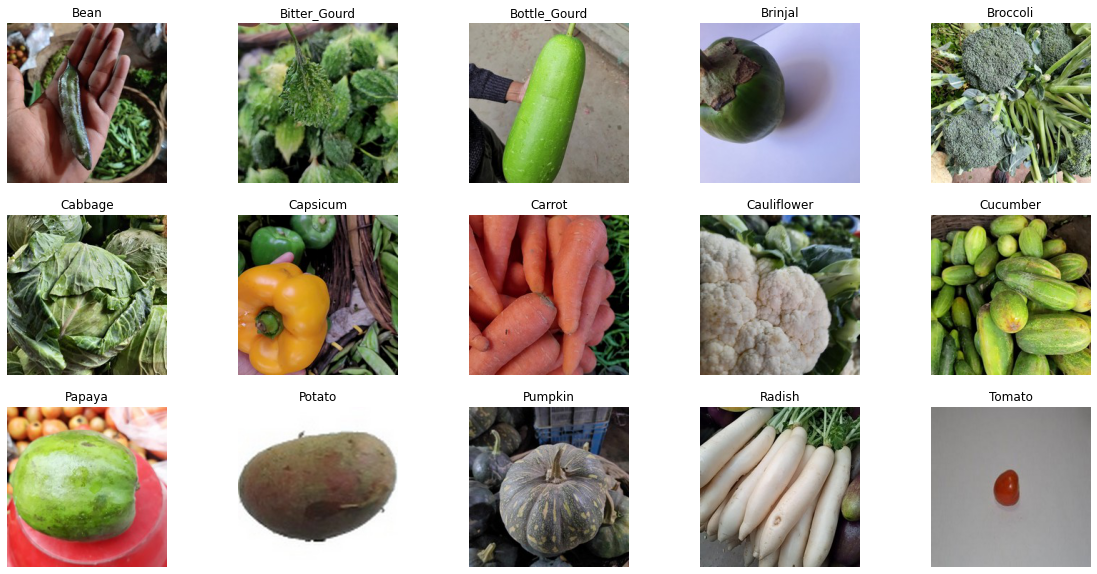

In [14]:
def Imagenes(Categorias):
    plt.figure(figsize=(20, 10))
    for i, categoria in enumerate(Categorias):
        ruta_imagen = ruta_entrenamiento + '/' + categoria
        nombre_imagenes = os.listdir(ruta_imagen)
        numero_imagenes = len(nombre_imagenes)
        imagen_aleatoria= nombre_imagenes[random.randint(0,numero_imagenes-1)]
        ruta_imagen_aleatoria = ruta_imagen + '/' + imagen_aleatoria
        imagen = image.load_img(ruta_imagen_aleatoria)
        imagen_arr = image.img_to_array(imagen)/255.0
        print(imagen)
        
        # Create Subplot and plot the images
        plt.subplot(3, 5, i+1)
        plt.imshow(imagen_arr)
        plt.title(categoria)
        plt.axis('off')
        
    plt.show()

# Call the function
Imagenes(Categorias)

In [15]:
Hg = 150
Lng = 150
EPOCHS = 20
BS = 16

In [46]:

# 1. Entrenamiento
entrenamiento_gen = ImageDataGenerator(rescale = 1.0/255.0, rotation_range=10,width_shift_range=0.2) # Normalise the data
entrenamiento_generator = entrenamiento_gen.flow_from_directory(ruta_entrenamiento,target_size=(Hg, Lng),batch_size=BS,class_mode='categorical')

# 2. Validation Set
validacion_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
validacion_generator =validacion_gen.flow_from_directory(ruta_validacion,target_size=(Hg, Lng),batch_size=BS,class_mode='categorical')



Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


(16, 150, 150, 3)


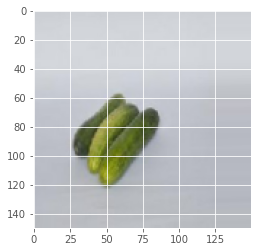

In [56]:
for _ in range(1):
    img, label = test_image_generator.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

In [29]:
#Construir Red
model = Sequential() # model object
# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[Hg, Lng, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 43808)             0         
                                                                 
 dense_9 (Dense)             (None, 32)               

In [58]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc', 'AUC'])
hist = model.fit(entrenamiento_generator, 
                 epochs=EPOCHS, 
                 verbose=1, 
                 validation_data=validacion_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/20
468/468 [==============================] - 157s 333ms/step - loss: 1.0626 - acc: 0.6594 - auc: 0.9556 - val_loss: 0.7267 - val_acc: 0.7809 - val_auc: 0.9788
Epoch 2/20
468/468 [==============================] - 154s 330ms/step - loss: 0.9589 - acc: 0.6856 - auc: 0.9636 - val_loss: 0.6611 - val_acc: 0.8138 - val_auc: 0.9833
Epoch 3/20
468/468 [==============================] - 141s 300ms/step - loss: 0.8835 - acc: 0.7037 - auc: 0.9687 - val_loss: 0.6261 - val_acc: 0.8219 - val_auc: 0.9833
Epoch 4/20
468/468 [==============================] - 143s 304ms/step - loss: 0.8532 - acc: 0.7178 - auc: 0.9713 - val_loss: 0.5981 - val_acc: 0.8306 - val_auc: 0.9844
Epoch 5/20
468/468 [==============================] - 133s 285ms/step - loss: 0.8471 - acc: 0.7199 - auc: 0.9709 - val_loss: 0.5398 - val_acc: 0.8401 - val_auc: 0.9872
Epoch 6/20
468/468 [==============================] - 133s 285ms/step - loss: 0.8010 - acc: 0.7350 - auc: 0.9745 - val_loss: 0.5299 - val_acc: 0.8474 - val_auc:

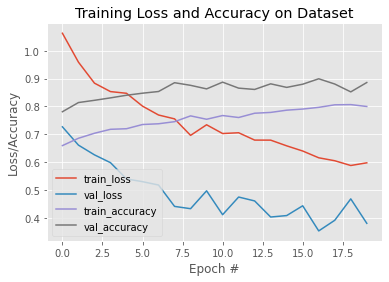

In [59]:
N = np.arange(0, EPOCHS)

plt.style.use("ggplot")
plt.figure()
plt.plot(N, hist.history["loss"], label="train_loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.plot(N, hist.history["acc"], label="train_accuracy")
plt.plot(N, hist.history["val_acc"], label="val_accuracy")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('result.png')

In [64]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0, rotation_range=10,width_shift_range=0.2) # Normalise the data
test_image_generator = test_gen.flow_from_directory(ruta_validacion,target_size=(Hg, Lng),batch_size=1,class_mode='categorical',shuffle=False)


Found 3000 images belonging to 15 classes.


In [66]:
filenames = test_image_generator.filenames

In [68]:
nb_samples = len(filenames)

In [92]:
predict = model.predict_generator(test_image_generator,steps = nb_samples)


In [100]:
predicted_classes = np.argmax(predict, axis=1)

In [101]:
true_classes = test_image_generator.classes

In [102]:

class_labels = list(test_image_generator.class_indices.keys()) 

In [108]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  


              precision    recall  f1-score   support

        Bean       0.92      0.83      0.87       200
Bitter_Gourd       0.94      0.95      0.95       200
Bottle_Gourd       0.94      0.85      0.90       200
     Brinjal       0.80      0.95      0.87       200
    Broccoli       0.99      0.69      0.82       200
     Cabbage       0.68      0.91      0.78       200
    Capsicum       0.96      0.94      0.95       200
      Carrot       0.99      0.94      0.97       200
 Cauliflower       0.94      0.74      0.83       200
    Cucumber       0.91      0.91      0.91       200
      Papaya       0.90      0.95      0.92       200
      Potato       0.92      0.97      0.94       200
     Pumpkin       0.88      0.85      0.86       200
      Radish       0.89      0.91      0.90       200
      Tomato       0.79      0.89      0.84       200

    accuracy                           0.89      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.90   

In [117]:
true_classes.shape

(3000,)

In [118]:
predicted_classes.shape

(3000,)

In [124]:
a =[x for x in range(0,15)]

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true= true_classes, y_pred=predicted_classes, labels=a)


In [129]:
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=class_labels)

Text(0.5, 48.5, 'Etiquete Predecida')

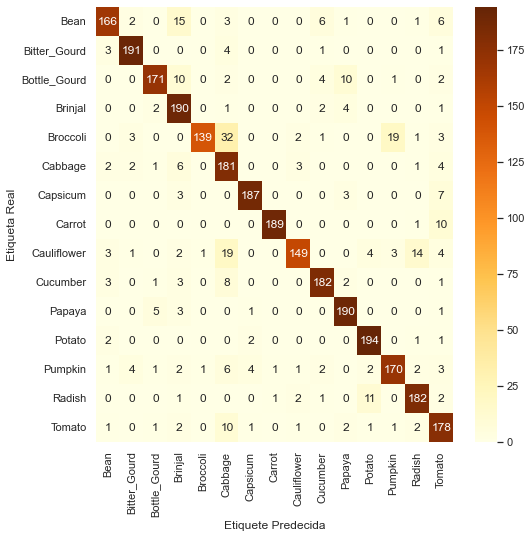

In [146]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels = class_labels, 
            yticklabels = class_labels)
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiquete Predecida')